# 1. Import Libraries

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from loguru import logger
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from matplotlib import cm
from matplotlib.ticker import (AutoLocator, AutoMinorLocator)
import pickle
import shap
print(f'Current working directory: {os.getcwd()}')
# change directory
os.chdir('../')
print(f'New working directory: {os.getcwd()}')

Current working directory: c:\Users\tolayi1\Documents\GitHub\compositional_model\notebooks
New working directory: c:\Users\tolayi1\Documents\GitHub\compositional_model


In [2]:
from source.pNelectro.postProcessing import PostProcessing
from source.pNelectro.dataPreprocessing import DataPreprocessing
from source.pNelectro.deviceOpt import DeviceOptimizer
from source.plotters import Plotters

dp = DataPreprocessing(out_features=3)
dop = DeviceOptimizer()
post_process = PostProcessing()
plotter = Plotters()

# 2. Import Data

In [3]:
random_state = 42
id = './data/processed/2024-02-15-simulated_data_Ecell_Concentrtn_no_membrane_info_CASE_3-speed-up.csv'
sim_data = pd.read_csv(f'{id}')
sim_data = sim_data.sample(frac=1, random_state=random_state).reset_index(drop=True)
print(sim_data.shape)
sim_data.head()

(5982, 12)


,Ecell,Dil,Conc,Ncell,T_tot,IEC_r,poros_r,dens_r,dp,SR,EC,TEE
0,0.4,3.5,2.5,1,90.0,0.57,0.243,1.404,0.57,0.223286,0.173201,0.471689
1,0.4,5.0,5.0,10,30.0,0.77,0.238,1.442,0.57,0.556324,0.201865,0.463743
2,0.4,3.5,1.0,3,90.0,0.77,0.238,1.442,0.57,0.545219,0.176736,0.415796
3,0.1,2.5,2.5,7,60.0,1.05,0.130,1.276,0.57,0.276799,0.054217,0.487327
4,2.0,1.0,3.5,1,90.0,0.77,0.238,1.442,0.57,0.786540,0.919414,0.492563


In [4]:
sim_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Ecell,5982.0,0.900502,0.722067,0.100000,0.400000,1.000000,2.000000,2.000000
Dil,5982.0,3.062423,1.432218,1.000000,2.500000,3.500000,5.000000,5.000000
Conc,5982.0,2.959502,1.453646,1.000000,1.000000,2.500000,3.500000,5.000000
Ncell,5982.0,5.243731,3.483706,1.000000,3.000000,4.000000,7.000000,10.000000
T_tot,5982.0,75.000000,33.600971,15.000000,45.000000,75.000000,105.000000,165.000000
IEC_r,5982.0,0.645961,0.322268,0.000000,0.570000,0.770000,0.790000,1.050000
poros_r,5982.0,0.343001,0.296322,0.130000,0.186000,0.238000,0.265000,1.000000
dens_r,5982.0,1.140582,0.511157,0.000000,1.276000,1.348000,1.404000,1.442000
dp,5982.0,0.475476,0.212017,0.000000,0.570000,0.570000,0.570000,0.570000
SR,5982.0,0.589342,0.313013,0.008700,0.289214,0.632732,0.899906,0.995827


2024-02-20 15:23:22.154 | INFO     | source.pNelectro.dataPreprocessing:cluster_data:308 - Simulated data: (5982, 6)
2024-02-20 15:23:22.155 | INFO     | source.pNelectro.dataPreprocessing:cluster_data:313 - Performing DR...
2024-02-20 15:23:23.136 | INFO     | source.pNelectro.dataPreprocessing:cluster_data:337 - Clustering...
2024-02-20 15:23:23.234 | INFO     | source.pNelectro.dataPreprocessing:cluster_data:346 - d0: (5982,)
2024-02-20 15:23:23.235 | INFO     | source.pNelectro.dataPreprocessing:cluster_data:347 - d1: (5982,)
2024-02-20 15:23:23.237 | INFO     | source.pNelectro.dataPreprocessing:cluster_data:349 - labels: (5982,)
2024-02-20 15:23:23.237 | INFO     | source.pNelectro.dataPreprocessing:cluster_data:350 - Unique labels: 17
No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


Preparing plot...


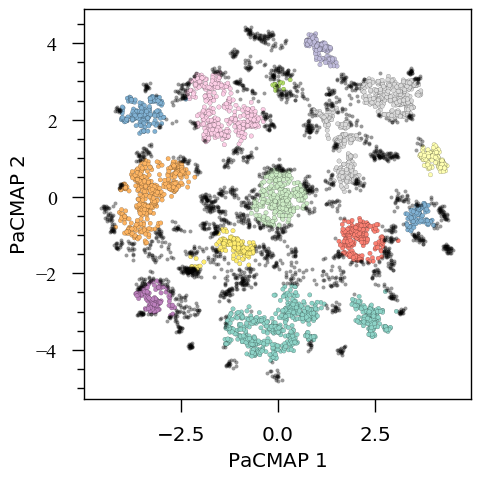

In [5]:
cl_dict = dp.cluster_data(
                            data = sim_data.iloc[:, :-3],
                            neighbors=None,
                            mn_ratio=0.5,
                            fp_ratio=2,
                            lr=0.1)

dp.plot_training_data(cl_dict['clustered_df'], target = False, name = 'source_domain')

# 3. OOD Detection

Shape of distances: (5982, 2)
[[    0     1     2 ... 11961 11962 11963]]


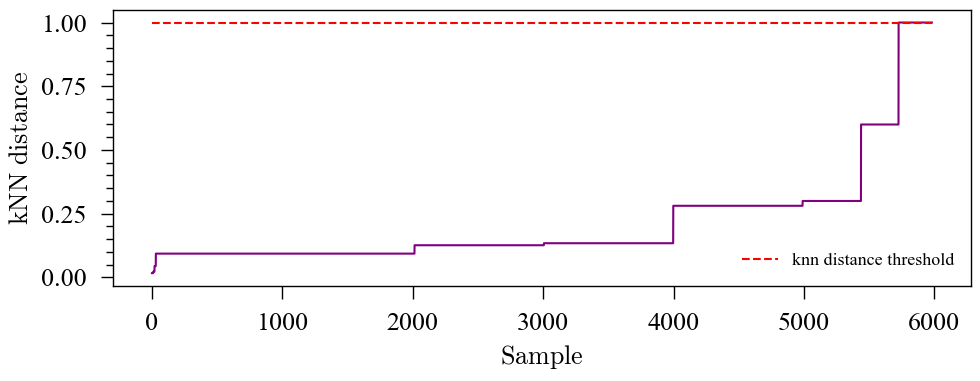

Threshold: 1.0
Shape of distances: (5982, 3)
[[    0     1     2 ... 17943 17944 17945]]


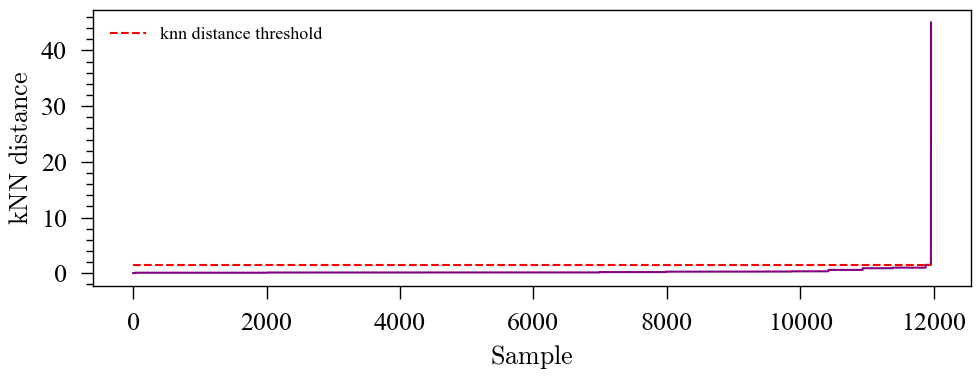

Threshold: 1.5
Shape of distances: (5982, 4)
[[    0     1     2 ... 23925 23926 23927]]


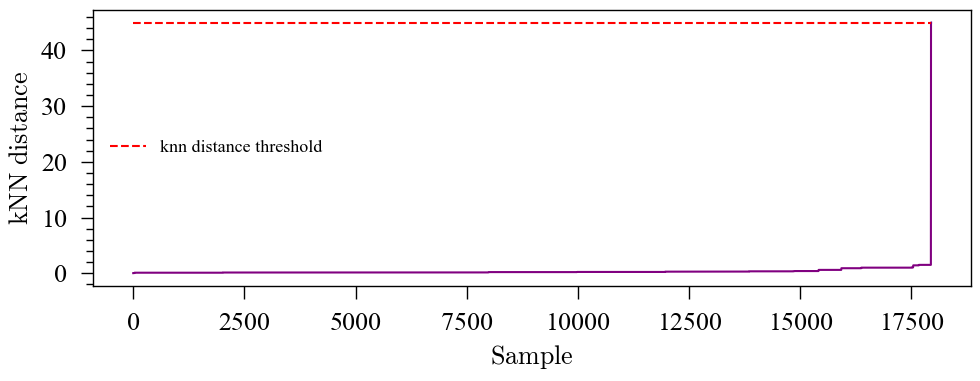

Threshold: 45.00021706461691
Shape of distances: (5982, 6)
[[    0     1     2 ... 35889 35890 35891]]


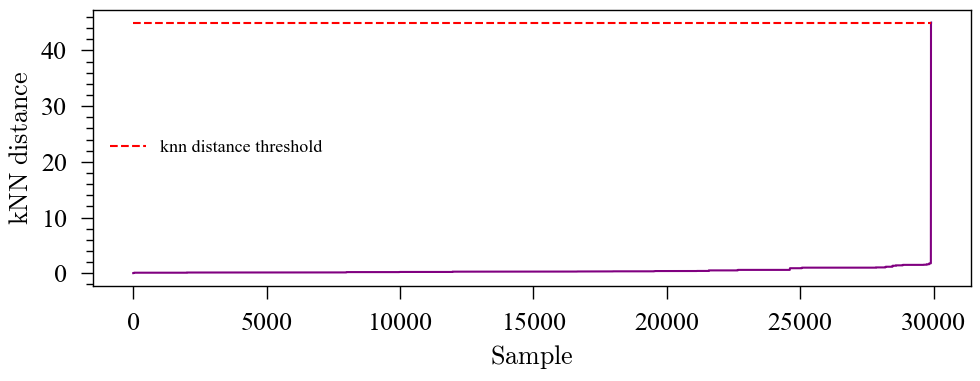

Threshold: 45.00170759141581
Shape of distances: (5982, 10)
[[    0     1     2 ... 59817 59818 59819]]


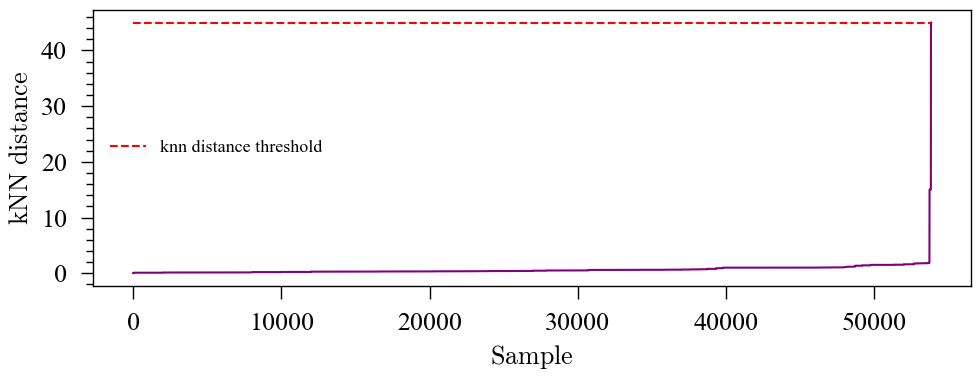

Threshold: 45.00175481254091
Shape of distances: (5982, 20)
[[     0      1      2 ... 119637 119638 119639]]


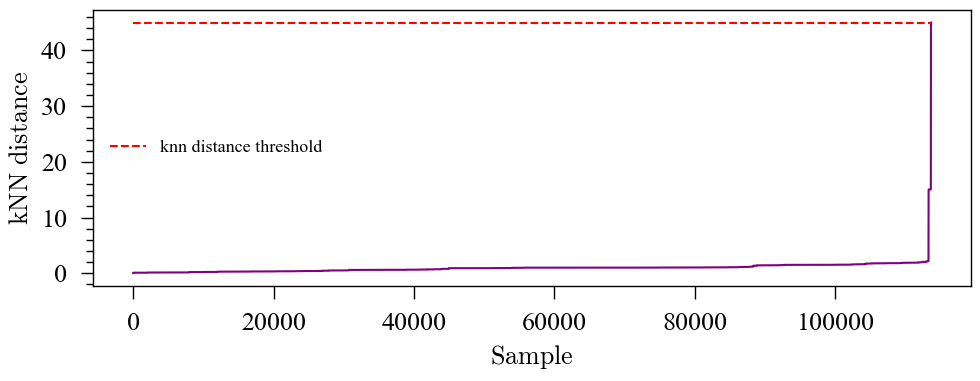

Threshold: 45.016888321573816


In [6]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
from kneed import KneeLocator

def get_threshold(training_data, n_neighbors=20, save_fig=False, figure_name='elbow.png', figsize=(10, 4)):

    # get training data and compute kNN distance
    # sort

    nbrs = NearestNeighbors(n_neighbors = n_neighbors).fit(training_data)
    distances, indices = nbrs.kneighbors(training_data)

    print(f'Shape of distances: {distances.shape}')

    distances = distances.flatten()
    #plt.plot_elbow(distances)

    print(np.indices(distances.shape))

    kneedle = KneeLocator(np.indices(distances.shape)[0], distances, S=1.0, curve="convex", direction="increasing")

    threshold = np.sort(distances)[kneedle.knee]

    dp.plot_elbow(distances = distances, threshold = threshold, name = figure_name, save_fig=save_fig, figsize=figsize)

    return threshold, nbrs

for k in [2, 3, 4, 6, 10, 20]:
    threshold, nbrs = get_threshold(sim_data.iloc[:, :-3].values, n_neighbors=k)
    print(f"Threshold: {threshold}")

Shape of distances: (5982, 2)
[[    0     1     2 ... 11961 11962 11963]]


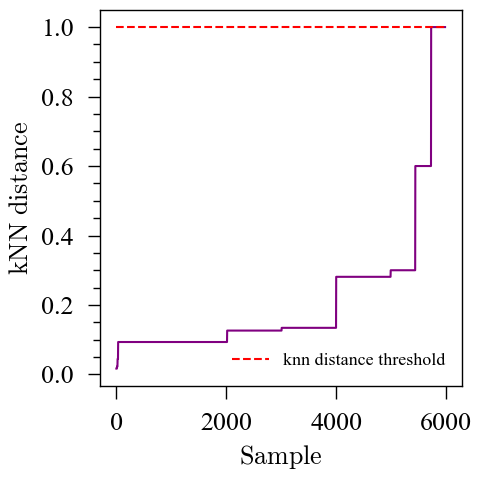

Threshold: 1.0


In [7]:
threshold, nbrs = get_threshold(sim_data.iloc[:, :-3].values, n_neighbors=2, save_fig=True,
                    figure_name='2024-02-15-simulated_data_Ecell_Concentrtn_no_membrane_info_CASE_3_domain-elbow-plot', figsize=(5, 5))

print(f"Threshold: {threshold}")

# 4. Pretrained Models

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow import keras
import tensorflow as tf
from keras import backend as K

# coefficient of determination (R^2) for regression
def r_square(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return (1 - SS_res/(SS_tot + K.epsilon()))

# root mean squared error (rmse) for regression
def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1))

## 4.1 Source Model

In [9]:
!ls -lrt './models/2024-02-20_source_model_approach_R2.h5'

-rw-r--r-- 1 tolayi1 Domain Users 43344 Feb 20 09:52 ./models/2024-02-20_source_model_approach_R2.h5


In [10]:
!ls -lrt './models/2024-02-20_target_model_approach_R2.h5'

-rw-r--r-- 1 tolayi1 domain users 42596 Feb 20 09:56 ./models/2024-02-20_target_model_approach_R2.h5


In [12]:
def source_model():
    # {'num_layers': 4, 'learning_rate': 0.001, 
    # 'units_0': 50, 'units_1': 42, 'units_2': 29, 'units_3': 50}
    model = Sequential()
    model.add(keras.layers.Dense(50, activation='relu'))
    model.add(keras.layers.Dense(42, activation='relu'))
    model.add(keras.layers.Dense(29, activation='relu'))
    model.add(keras.layers.Dense(50, activation='relu'))
    model.add(keras.layers.Dense(3, activation='linear'))

    model.compile(
            optimizer=tf.keras.optimizers.Adam(learning_rate=1e-2),
            loss="mean_squared_error", metrics=["mean_squared_error", rmse, r_square])
    
    return model
# Create a new model for transfer learning
SourceModel = source_model()


In [13]:
# create dummy data with shape (10, 9) and (10, 3)
X = np.random.rand(10, 9) 
y = np.random.rand(10, 3)

# fit the model
history = SourceModel.fit(X, y, epochs=1, verbose=1)

1/1 [==============================] - 1s 555ms/step - loss: 0.3569 - mean_squared_error: 0.3569 - rmse: 0.5599 - r_square: -3.3636


In [14]:
SourceModel.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 50)                500       
                                                                 
 dense_6 (Dense)             (None, 42)                2142      
                                                                 
 dense_7 (Dense)             (None, 29)                1247      
                                                                 
 dense_8 (Dense)             (None, 50)                1500      
                                                                 
 dense_9 (Dense)             (None, 3)                 153       
                                                                 
Total params: 5542 (21.65 KB)
Trainable params: 5542 (21.65 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
SourceModel.load_weights('./models/2024-02-20_source_model_approach_R2.h5')

## 4.2 Target Model

In [16]:
inputs = keras.Input(shape=(9,)) # X_train_transfer.shape[1] inputs
x = SourceModel(inputs, training=False) # transfer learning; use the trained model and set training to False
outputs = keras.layers.Dense(3)(x) # 3 outputs
TargetModel = keras.Model(inputs, outputs)
TargetModel.compile(
            optimizer=tf.keras.optimizers.Adam(learning_rate=1e-6),
            loss="mean_squared_error", metrics=["mean_squared_error", rmse, r_square])

In [17]:
# load weights from the saved weights
TargetModel.load_weights('./models/2024-02-20_target_model_approach_R2.h5')

In [18]:
TargetModel.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 9)]               0         
                                                                 
 sequential_1 (Sequential)   (None, 3)                 5542      
                                                                 
 dense_10 (Dense)            (None, 3)                 12        
                                                                 
Total params: 5554 (21.70 KB)
Trainable params: 5554 (21.70 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
TargetModel.get_weights()

[array([[ 4.20650750e-01,  4.61132109e-01, -6.69597030e-01,
          1.00183479e-01,  2.14947984e-01, -1.98264390e-01,
          3.82346749e-01, -4.41112965e-01,  2.06167966e-01,
          7.98595250e-02, -9.63566974e-02, -3.43173921e-01,
         -2.56239831e-01, -6.26075491e-02, -3.69031578e-01,
         -1.02223061e-01, -4.14484352e-01,  2.88944751e-01,
          5.40376067e-01,  9.04803276e-02,  3.27107906e-01,
         -5.94828308e-01, -8.95426124e-02, -2.30949178e-01,
          7.13080764e-02,  1.05318472e-01, -3.51731665e-02,
          7.08599836e-02, -2.19420224e-01, -3.42702687e-01,
          3.14165413e-01, -1.30067244e-01, -1.35455698e-01,
         -6.41495734e-02,  1.23136394e-01,  3.63227308e-01,
          9.94729344e-03,  3.35607857e-01,  2.04850987e-01,
         -2.27052975e+00,  1.55901358e-01, -1.16481453e-01,
         -1.98198691e-01,  3.82746011e-02,  2.67518908e-01,
          6.44347817e-02,  1.57657176e-01, -6.10046554e-03,
         -2.78858334e-01,  2.65783548e-0

# 4.5 Optimization

In [20]:
import numpy as np
import pickle
from pymoo.core.problem import ElementwiseProblem
from pymoo.core.variable import Real
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.optimize import minimize

In [21]:
# load scaler
random_seed = 104 #np.random.randint(0, 1000)
logger.info(f'Random seed: {random_seed}')
train_size, test_size, val_size = 0.8, 0.15, 0.05
source_scaler = f"{datetime.now().strftime('%Y-%m-%d')}_source_EOS_R2_scaler_seed{random_seed}_train_size{(1 - test_size - val_size)*100}percent"

scaler = pickle.load(open(f'./models/{source_scaler}.pkl', 'rb'))

2024-02-20 15:26:40.515 | INFO     | __main__:<module>:3 - Random seed: 104


In [22]:
def SR(X): 
    '''Model predict for SR'''
    # scale the inputs
    inputs =  scaler.transform(X)
    # predict
    output = TargetModel.predict(inputs)

    return output[:, 0].flatten() 

def EC(X):
    '''Model predict for EC'''
    # scale the inputs
    inputs_ =  scaler.transform(X)
    # predict
    output = TargetModel.predict(inputs_)

    return output[:, 1].flatten() 

def TEE(X):
    '''Model predict for TEE'''
    # scale the inputs
    inputs_ =  scaler.transform(X)
    # predict
    output = TargetModel.predict(inputs_)

    return output[:, 2].flatten() 

In [23]:
features_df = sim_data.iloc[:, :-3]

In [24]:
sim_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Ecell,5982.0,0.900502,0.722067,0.100000,0.400000,1.000000,2.000000,2.000000
Dil,5982.0,3.062423,1.432218,1.000000,2.500000,3.500000,5.000000,5.000000
Conc,5982.0,2.959502,1.453646,1.000000,1.000000,2.500000,3.500000,5.000000
Ncell,5982.0,5.243731,3.483706,1.000000,3.000000,4.000000,7.000000,10.000000
T_tot,5982.0,75.000000,33.600971,15.000000,45.000000,75.000000,105.000000,165.000000
IEC_r,5982.0,0.645961,0.322268,0.000000,0.570000,0.770000,0.790000,1.050000
poros_r,5982.0,0.343001,0.296322,0.130000,0.186000,0.238000,0.265000,1.000000
dens_r,5982.0,1.140582,0.511157,0.000000,1.276000,1.348000,1.404000,1.442000
dp,5982.0,0.475476,0.212017,0.000000,0.570000,0.570000,0.570000,0.570000
SR,5982.0,0.589342,0.313013,0.008700,0.289214,0.632732,0.899906,0.995827


## 4.5.1 -SR/-TEE + distance

In [26]:
class HybridEOSOpt(ElementwiseProblem):
    def __init__(self, **kwargs):
        super().__init__(n_var=9, n_obj=3, n_constr=4, vtype=float)
        self.xl = np.array([0.10, 1.00, 1.00, 1.00, 15.00, 0.00, 0.13, 0.00, 0.00])
        self.xu = np.array([2.00, 5.00, 5.00, 10.00, 180.00, 1.05, 1.00, 1.442, 0.570])
        # Ecell, Dil, Conc, Ncell, T_tot, IEC_r, poros_r, dens_r, dp
    
    def _evaluate(self, X, out, *args, **kwargs):
        
        features = np.asarray([X[0], X[1], X[2], X[3], X[4], 
                                X[5], X[6], X[7], X[8]])
                               
        # get distance and out of distribution
        ood, distance = dop.ood(x = np.asarray(features), nbrs = nbrs, threshold = threshold)
        # objective function
        features = pd.DataFrame([features], columns=list(features_df.columns))
        f1 = SR(features) 
        f3 = TEE(features)
        f4 = np.array(distance).reshape(1, ) # distance

        ## Constraints
        # (0.99, 0.1) # --> max and min SR_max
        # (0.68, 0.21) # --> max and min TEE_max
        # 0.1 < f1 < 0.99
        # f1 >= 0.1; 
        g1 = -f1 + 0.1 # f1 >= 0.1; => -f1 <= -0.1
        g2 = f1 - 0.99  # f1 <= 0.99
        # 0.20 < f3 < 0.68
        g4 = -f3 + 0.20  # f3 >= 0.20 => -f3 <= -0.20
        g5 = f3 - 0.68  # f3 <= 0.623
                    
        
        out["F"] = [-f1, -f3, f4] # maximize SR, minimize EC, maximize TEE, minimize distance
        out["G"] = [g1, g2, g4, g5] # 0<= SR <= 1, EC >= 0, 0 <= TEE <= 1

problem_SR_TEE_dist = HybridEOSOpt()

algorithm_SR_TEE_dist = NSGA2(pop_size=50)


res_SR_TEE_dist = minimize(problem_SR_TEE_dist, algorithm_SR_TEE_dist, ('n_gen', 100), seed=1, verbose=False)

1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 13ms/step


Shape of F: (50, 3), Shape of X: (50, 9)
1.0


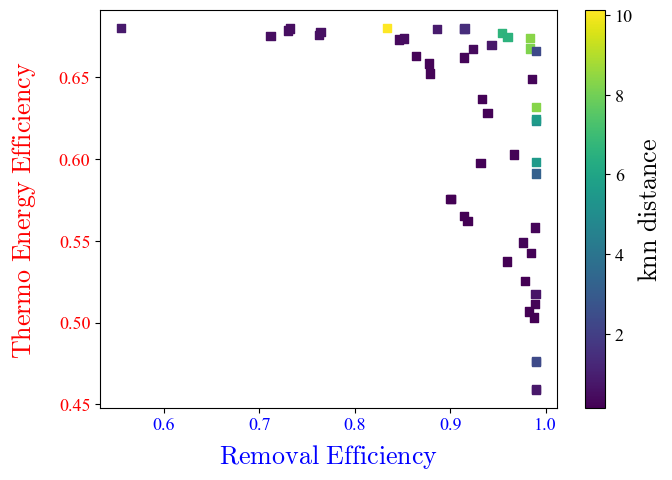

In [27]:
print(f'Shape of F: {res_SR_TEE_dist.F.shape}, Shape of X: {res_SR_TEE_dist.X.shape}')

obj1 = res_SR_TEE_dist.F[:, -1] # distance
obj2 = res_SR_TEE_dist.F[:, 0] * -1 # SR
obj3 = res_SR_TEE_dist.F[:, 1] * -1 # TEE
print(threshold)

plotter.plot_pareto_device_PCA(
                        obj1 = obj1, 
                        obj2 = obj2,  
                        obj3 = obj3,
                        x_name=r'$\rm Removal\ Efficiency$',
                        y_name = r'$\rm Thermo\ Energy\ Efficiency$',
                        z_name = r'$\rm knn\ distance$',
                        save_fig = False,
                        fig_name = '2024-02-15_pareto_device_Ecell_Concentrtn_no_membrane_info_CASE_3_SR_TEE_incl_distance_neigbors_2')

## 4.3.2 -SR/EC + distance

In [29]:
class HybridEOSOpt(ElementwiseProblem):
    def __init__(self, **kwargs):
        super().__init__(n_var=9, n_obj=3, n_constr=3, vtype=float)
        self.xl = np.array([0.10, 1.00, 1.00, 1.00, 15.00, 0.00, 0.13, 0.00, 0.00])
        self.xu = np.array([2.00, 5.00, 5.00, 10.00, 180.00, 1.05, 1.00, 1.442, 0.570])
        # Ecell, Dil, Conc, Ncell, T_tot, IEC_r, poros_r, dens_r, dp
    
    def _evaluate(self, X, out, *args, **kwargs):
        
        features = np.asarray([X[0], X[1], X[2], X[3], X[4], 
                                X[5], X[6], X[7], X[8]])
                               
        # get distance and out of distribution
        ood, distance = dop.ood(x = np.asarray(features), nbrs = nbrs, threshold = threshold)
        # objective function
        features = pd.DataFrame([features], columns=list(features_df.columns))
        f1 = SR(features) 
        f2 = EC(features)
        f3 = TEE(features)
        f4 = np.array(distance).reshape(1, ) # distance

        ## Constraints
        # SR
        g1 = -f1 + 0.1 # f1 >= 0.1; => -f1 <= -0.1
        g2 = f1 - 0.99  # f1 <= 0.99
        # EC
        g3 = -f2  # f2 >= 0; -f2 <= 0
        # TEE
        g4 = -f3 + 0.20  # f3 >= 0.20 => -f3 <= -0.20
        g5 = f3 - 0.68  # f3 <= 0.623
                    
        
        out["F"] = [-f1, f2, f4] # maximize SR, minimize EC, maximize TEE, minimize distance
        out["G"] = [g1, g2, g3] # 0<= SR <= 1, EC >= 0, 0 <= TEE <= 1

problem_SR_EC_dist = HybridEOSOpt()

algorithm_SR_EC_dist = NSGA2(pop_size=50)


res_SR_EC_dist = minimize(problem_SR_EC_dist, algorithm_SR_EC_dist, ('n_gen', 100), seed=1, verbose=False)

1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 17ms/step


Shape of F: (50, 3), Shape of X: (50, 9)
1.0


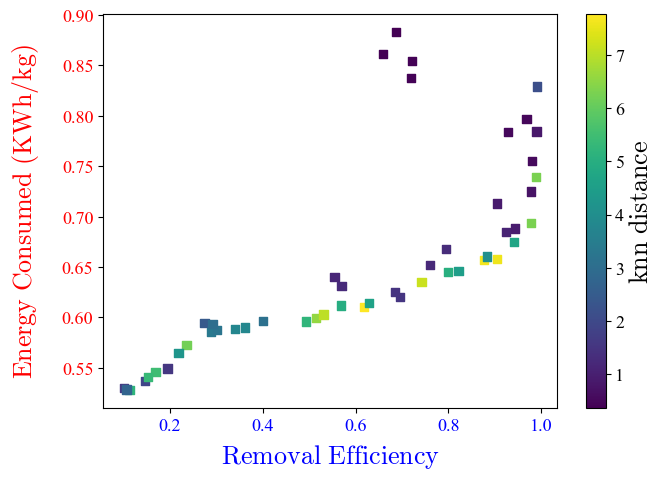

In [31]:
print(f'Shape of F: {res_SR_EC_dist.F.shape}, Shape of X: {res_SR_EC_dist.X.shape}')

obj1_SR_EC_dist = res_SR_EC_dist.F[:, -1] # distance
obj2_SR_EC_dist = res_SR_EC_dist.F[:, 0] * -1 # SR
obj3_SR_EC_dist = res_SR_EC_dist.F[:, 1] # EC
print(threshold)

plotter.plot_pareto_device_PCA(
                        obj1 = obj1_SR_EC_dist, 
                        obj2 = obj2_SR_EC_dist,  
                        obj3 = obj3_SR_EC_dist,
                        x_name=r'$\rm Removal\ Efficiency$',
                        y_name = r'$\rm Energy\ Consumed\ (KWh/kg)$',
                        z_name = r'$\rm knn\ distance$',
                        save_fig = False,
                        fig_name = '2024-02-15_pareto_device_Ecell_Concentrtn_no_membrane_info_CASE_3_SR_EC_incl_distance_neigbors_2')

## 4.5.3 -TEE/EC + distance

In [32]:
class HybridEOSOpt(ElementwiseProblem):
    def __init__(self, **kwargs):
        super().__init__(n_var=9, n_obj=3, n_constr=3, vtype=float)
        self.xl = np.array([0.10, 1.00, 1.00, 1.00, 15.00, 0.00, 0.13, 0.00, 0.00])
        self.xu = np.array([2.00, 5.00, 5.00, 10.00, 180.00, 1.05, 1.00, 1.442, 0.570])
        # Ecell, Dil, Conc, Ncell, T_tot, IEC_r, poros_r, dens_r, dp
    
    def _evaluate(self, X, out, *args, **kwargs):
        
        features = np.asarray([X[0], X[1], X[2], X[3], X[4], 
                                X[5], X[6], X[7], X[8]])
                               
        # get distance and out of distribution
        ood, distance = dop.ood(x = np.asarray(features), nbrs = nbrs, threshold = threshold)
        # objective function
        features = pd.DataFrame([features], columns=list(features_df.columns))
        f1 = SR(features) 
        f2 = EC(features)
        f3 = TEE(features)
        f4 = np.array(distance).reshape(1, ) # distance

        ## Constraints
        # SR
        g1 = -f1 + 0.1 # f1 >= 0.1; => -f1 <= -0.1
        g2 = f1 - 0.99  # f1 <= 0.99
        # EC
        g3 = -f2  # f2 >= 0; -f2 <= 0
        # TEE
        g4 = -f3 + 0.20  # f3 >= 0.20 => -f3 <= -0.20
        g5 = f3 - 0.68  # f3 <= 0.623
                    
        
        out["F"] = [-f3, f2, f4] # maximize SR, minimize EC, maximize TEE, minimize distance
        out["G"] = [g4, g5, g3] # 0<= SR <= 1, EC >= 0, 0 <= TEE <= 1

problem_TEE_EC_dist = HybridEOSOpt()
algorithm_TEE_EC_dist = NSGA2(pop_size=50)
res_TEE_EC_dist = minimize(problem_TEE_EC_dist, algorithm_TEE_EC_dist, ('n_gen', 100), seed=1, verbose=False)

1/1 [==============================] - 0s 19ms/step


Shape of F: (50, 3), Shape of X: (50, 9)
1.0


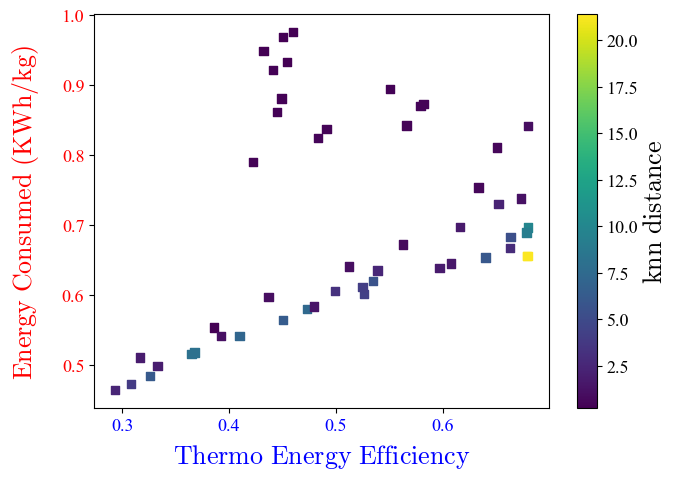

In [33]:
print(f'Shape of F: {res_TEE_EC_dist.F.shape}, Shape of X: {res_TEE_EC_dist.X.shape}')

obj1_TEE_EC_dist = res_TEE_EC_dist.F[:, -1] # distance
obj2_TEE_EC_dist = res_TEE_EC_dist.F[:, 0] * -1 # TEE
obj3_TEE_EC_dist = res_TEE_EC_dist.F[:, 1]
print(threshold)

plotter.plot_pareto_device_PCA(
                        obj1 = obj1_TEE_EC_dist, 
                        obj2 = obj2_TEE_EC_dist,  
                        obj3 = obj3_TEE_EC_dist,
                        x_name= r'$\rm Thermo\ Energy\ Efficiency$',
                        y_name = r'$\rm Energy\ Consumed\ (KWh/kg)$',
                        z_name = r'$\rm knn\ distance$', 
                        save_fig = False,
                        fig_name = '2024-02-15_pareto_device_Ecell_Concentrtn_no_membrane_info_CASE_3_TEE_EC_incl_distance_neigbors_2')